This notebook is used to tokenized by sentences the UNGA corpus combined frow the raw texts files downloaded from the UNGA website. 

In [1]:
import pandas as pd # For importing data
import os # For file manipulation

import nltk # For tokenization
from nltk.tokenize import sent_tokenize
nltk.download('punkt') # Download the Punkt tokenizer for sentence tokenization

[nltk_data] Downloading package punkt to /Users/malo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Set up

In [2]:
# Get the current working directory
current_directory = os.getcwd()

# Define the relative path to 'edf_un_climate'
relative_path = "../../"

# Construct the absolute path
absolute_path = os.path.abspath(os.path.join(current_directory, relative_path))

absolute_path

'/Users/malo/Library/CloudStorage/GoogleDrive-malo.jan@sciencespo.fr/.shortcut-targets-by-id/17Ie9FRNLITIRVq7pV8zYiq6P5Op2F6Lu/edf_un_climate'

#### Import the data

In [3]:
# Import data

un = pd.read_parquet(absolute_path + "/data/un_speeches.parquet", engine='pyarrow')

#### Sentence tokenization

In [4]:
# Tokenization at the sentences level

# Split df text column into sentences tokens. Each row should be a token
un['text'] = un.text.apply(sent_tokenize)
un = un.explode('text')
un = un.reset_index(drop=True)

# Print the number of sentences

print('Number of sentences:', len(un))

un.head()

Number of sentences: 1319421


,doc_id,text,year,iso_code,session,country,name_of_person_speaking,post
0,ARG_01_1946.txt,At the resumption of the first session of the ...,1946.0,ARG,1.0,Argentina,Mr. Arce,None
1,ARG_01_1946.txt,Politics are determined by circumstances.,1946.0,ARG,1.0,Argentina,Mr. Arce,None
2,ARG_01_1946.txt,"Accordingly, in making these remarks, we do no...",1946.0,ARG,1.0,Argentina,Mr. Arce,None
3,ARG_01_1946.txt,We hope that these remarks will be interpreted...,1946.0,ARG,1.0,Argentina,Mr. Arce,None
4,ARG_01_1946.txt,"We are not sceptics, but our relative optimism...",1946.0,ARG,1.0,Argentina,Mr. Arce,None


In [5]:
# Add text id column : should start at each beginning of doc_id
un['text_id'] = un.groupby('doc_id').cumcount()

# Create an unique id for each text based on doc_id and text_id
un['id'] = un.doc_id.astype(str) + '_' + un.text_id.astype(str)

un.head()

,doc_id,text,year,iso_code,session,country,name_of_person_speaking,post,text_id,id
0,ARG_01_1946.txt,At the resumption of the first session of the ...,1946.0,ARG,1.0,Argentina,Mr. Arce,None,0,ARG_01_1946.txt_0
1,ARG_01_1946.txt,Politics are determined by circumstances.,1946.0,ARG,1.0,Argentina,Mr. Arce,None,1,ARG_01_1946.txt_1
2,ARG_01_1946.txt,"Accordingly, in making these remarks, we do no...",1946.0,ARG,1.0,Argentina,Mr. Arce,None,2,ARG_01_1946.txt_2
3,ARG_01_1946.txt,We hope that these remarks will be interpreted...,1946.0,ARG,1.0,Argentina,Mr. Arce,None,3,ARG_01_1946.txt_3
4,ARG_01_1946.txt,"We are not sceptics, but our relative optimism...",1946.0,ARG,1.0,Argentina,Mr. Arce,None,4,ARG_01_1946.txt_4


In [6]:
# Function to count words in a cell
def count_words(cell):
    # Split the cell into words using space as a delimiter and count the number of words
    words = cell.split()
    return len(words)

# Apply the count_words function to each cell in the Series and create a new variable
un['word_count'] = un['text'].apply(count_words)
un_less = un[un.word_count < 3]

Number of text with more than 512 words: 0


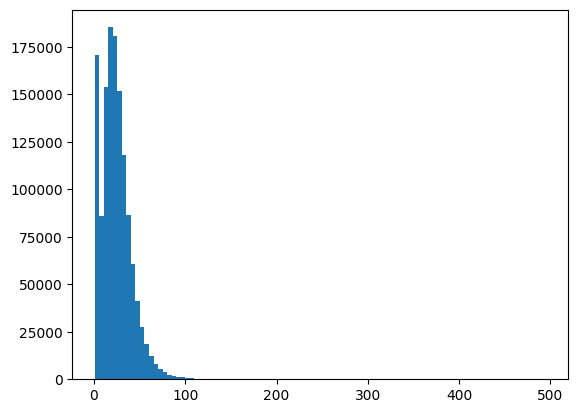

In [7]:
# Look at the word distribution visually

import matplotlib.pyplot as plt

# Plot the distribution of word counts without showing the array

plt.hist(un.word_count, bins=100)

# Count the number of text that has word_count > 512

print('Number of text with more than 512 words:', len(un[un.word_count > 512]))

In [9]:
# Save the tokenized data

un.to_parquet(absolute_path + '/data/un_speeches_tokenized.parquet', engine='pyarrow')